## Introduction

 “Building a unique NLP project: 1984 book vs 1984 album” . Inspired by the cultural phenomenon, Versus, in this project we’re going to be leveraging the NLP to compare 1984, the dystopian social science fiction novel by the English novelist George Orwell and 1984, the sixth studio album by American rock band Van Halen. 
 
 In this project, we’ll explore the NLP techniques of: 
 
 1. summarizing text 
 2. sentiment analysis 
 3. word clouds.

## Import the modules and libraries

In [ ]:
%pip install wordcloud
%pip install sumy

In [6]:
import os
import pandas as pd
from collections import Counter

#wordcloud
from PIL import Image
import numpy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#NLP Summarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

# NLP Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer

%matplotlib inline

## Data Exploration

In [7]:
# Van Halen 1984 album

album_dir = './Data/1984 album Van Halen'
songs = os.listdir(album_dir)
songs

['Panama.txt',
 'Drop Dead Legs.txt',
 'Jump.txt',
 'Girl Gone Bad.txt',
 'Hot for Teacher.txt',
 'House of Pain.txt',
 'Top Jimmy.txt',
 "I'll Wait.txt"]

In [8]:
# Create a corpus of the song lyrics of the album
album_corpus = []
for lyrics in songs:
    with open(album_dir + '/' + lyrics, encoding = 'utf-8') as file_input:
        album_corpus.append(file_input.read())

In [9]:
album_corpus

["[Intro]\nOoh\nOh yeah\nUh-huh, ah!\n\n[Verse 1]\nJump back, what's that sound?\nHere she comes, full blast and top down\nHot shoe, burning down the avenue\nModel citizen, zero discipline\n\n[Pre-Chorus]\nDon't you know she's coming home to me?\nYou'll lose her in the turn\nI'll get her, ah!\n\n[Chorus]\nPanama\nPanama\nPanama\nPanama\n\n[Verse 2]\nAin't nothin' like it, her shiny machine\nGot the feel for the wheel, keep the moving parts clean\nHot shoe, burning down the avenue\nOut an on-ramp coming through my bedroom\n\n\n[Pre-Chorus]\nDon't you know she's coming home to me?\nYou'll lose her in the turn\nI'll get her, ah!\nUh-oh\n\n[Chorus]\nPanama\nPanama, ow\nPanama, ah\nPanama, oh-oh-oh-oh\nWoo!\n\n[Guitar Solo]\n\n[Spoken Interlude]\nAh\nYeah, we're running a little bit hot tonight\nI can barely see the road from the heat coming off it, I say\nI reach down between my legs and\nEase the seat back\n\n[Bridge]\nShe's blinding, I'm flying\nRight behind in rearview mirror now\nGot t

In [10]:
# Extract the word list from the lyrics
album_wordlist = []

for lyrics in album_corpus:
    for word in lyrics.split():
        album_wordlist.append(word)
album_wordlist

['[Intro]',
 'Ooh',
 'Oh',
 'yeah',
 'Uh-huh,',
 'ah!',
 '[Verse',
 '1]',
 'Jump',
 'back,',
 "what's",
 'that',
 'sound?',
 'Here',
 'she',
 'comes,',
 'full',
 'blast',
 'and',
 'top',
 'down',
 'Hot',
 'shoe,',
 'burning',
 'down',
 'the',
 'avenue',
 'Model',
 'citizen,',
 'zero',
 'discipline',
 '[Pre-Chorus]',
 "Don't",
 'you',
 'know',
 "she's",
 'coming',
 'home',
 'to',
 'me?',
 "You'll",
 'lose',
 'her',
 'in',
 'the',
 'turn',
 "I'll",
 'get',
 'her,',
 'ah!',
 '[Chorus]',
 'Panama',
 'Panama',
 'Panama',
 'Panama',
 '[Verse',
 '2]',
 "Ain't",
 "nothin'",
 'like',
 'it,',
 'her',
 'shiny',
 'machine',
 'Got',
 'the',
 'feel',
 'for',
 'the',
 'wheel,',
 'keep',
 'the',
 'moving',
 'parts',
 'clean',
 'Hot',
 'shoe,',
 'burning',
 'down',
 'the',
 'avenue',
 'Out',
 'an',
 'on-ramp',
 'coming',
 'through',
 'my',
 'bedroom',
 '[Pre-Chorus]',
 "Don't",
 'you',
 'know',
 "she's",
 'coming',
 'home',
 'to',
 'me?',
 "You'll",
 'lose',
 'her',
 'in',
 'the',
 'turn',
 "I'll",
 'g

In [11]:
# find the total number of words
len(album_wordlist)

1398

In [12]:
# Find the unique words
unique_words = Counter(album_wordlist)
len(unique_words)

493

In [13]:
# George Orwell 1984 album
novel = './Data/1984-novel-George Orwell.txt'
novel_corpus = []
with open(novel, encoding = 'utf8') as file_input:
    novel_corpus.append(file_input.read())

In [14]:
novel_corpus

['Title:      Nineteen eighty-four\nAuthor:     George Orwell (pseudonym of Eric Blair) (1903-1950)\n\n\n\n\nPART ONE\n\n\n\nChapter 1\n\n\n\nIt was a bright cold day in April, and the clocks were striking thirteen.\nWinston Smith, his chin nuzzled into his breast in an effort to escape the\nvile wind, slipped quickly through the glass doors of Victory Mansions,\nthough not quickly enough to prevent a swirl of gritty dust from entering\nalong with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a\ncoloured poster, too large for indoor display, had been tacked to the wall.\nIt depicted simply an enormous face, more than a metre wide: the face of a\nman of about forty-five, with a heavy black moustache and ruggedly handsome\nfeatures. Winston made for the stairs. It was no use trying the lift. Even\nat the best of times it was seldom working, and at present the electric\ncurrent was cut off during daylight hours. It was part of the economy drive\nin prepara

In [15]:
novel_wordlist = novel_corpus[0].split()

In [16]:
novel_wordlist

['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'of',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'ONE',
 'Chapter',
 '1',
 'It',
 'was',
 'a',
 'bright',
 'cold',
 'day',
 'in',
 'April,',
 'and',
 'the',
 'clocks',
 'were',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'his',
 'chin',
 'nuzzled',
 'into',
 'his',
 'breast',
 'in',
 'an',
 'effort',
 'to',
 'escape',
 'the',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'through',
 'the',
 'glass',
 'doors',
 'of',
 'Victory',
 'Mansions,',
 'though',
 'not',
 'quickly',
 'enough',
 'to',
 'prevent',
 'a',
 'swirl',
 'of',
 'gritty',
 'dust',
 'from',
 'entering',
 'along',
 'with',
 'him.',
 'The',
 'hallway',
 'smelt',
 'of',
 'boiled',
 'cabbage',
 'and',
 'old',
 'rag',
 'mats.',
 'At',
 'one',
 'end',
 'of',
 'it',
 'a',
 'coloured',
 'poster,',
 'too',
 'large',
 'for',
 'indoor',
 'display,',
 'had',
 'been',
 'tacked',
 'to',
 'the',
 'wall.',
 'It',
 'depicted',
 'simply',
 'an',

In [17]:
# lenghth of the wordlist
len(novel_wordlist)

103377

In [18]:
len(Counter(novel_wordlist))

15530

## Create the WordCloud


In [19]:
# Create stopwords
stopwords =list(get_stop_words('english'))

In [20]:
stopwords

['though',
 'wish',
 'k',
 "you'll",
 'gives',
 'ex',
 'with',
 'although',
 'seem',
 'should',
 'inasmuch',
 'always',
 'nor',
 'gets',
 'somebody',
 'these',
 'neither',
 'selves',
 "aren't",
 'please',
 'a',
 'whereby',
 'need',
 'your',
 'followed',
 'more',
 'mostly',
 'in',
 'believe',
 "i'll",
 'p',
 'o',
 'indicated',
 'different',
 'either',
 'there',
 'up',
 'ltd',
 'presumably',
 'th',
 'herein',
 'formerly',
 't',
 'et',
 'after',
 'appear',
 'seven',
 'trying',
 'somewhat',
 'next',
 'changes',
 'beyond',
 'indicate',
 'any',
 'another',
 'you',
 'him',
 'her',
 'ones',
 'went',
 'insofar',
 'self',
 'nine',
 'asking',
 'used',
 'then',
 'will',
 'now',
 'specified',
 'done',
 'seems',
 "where's",
 'getting',
 "mustn't",
 'how',
 'along',
 'usually',
 "couldn't",
 'per',
 'from',
 'under',
 "how's",
 'non',
 'only',
 'alone',
 'than',
 'com',
 'myself',
 'h',
 'anybody',
 'second',
 'off',
 "they'll",
 'think',
 'overall',
 'sub',
 "we'd",
 'etc',
 'hither',
 'as',
 'consi

In [21]:
# Clean the wordlist of the Album
clean_wordlist = []
for word in album_wordlist:
    if word not in stopwords:
        clean_wordlist.append(word)
clean_wordlist

['[Intro]',
 'Ooh',
 'Oh',
 'yeah',
 'Uh-huh,',
 'ah!',
 '[Verse',
 '1]',
 'Jump',
 'back,',
 'sound?',
 'Here',
 'comes,',
 'full',
 'blast',
 'top',
 'Hot',
 'shoe,',
 'burning',
 'avenue',
 'Model',
 'citizen,',
 'discipline',
 '[Pre-Chorus]',
 "Don't",
 'coming',
 'home',
 'me?',
 "You'll",
 'lose',
 'turn',
 "I'll",
 'her,',
 'ah!',
 '[Chorus]',
 'Panama',
 'Panama',
 'Panama',
 'Panama',
 '[Verse',
 '2]',
 "Ain't",
 "nothin'",
 'it,',
 'shiny',
 'machine',
 'Got',
 'feel',
 'wheel,',
 'moving',
 'parts',
 'clean',
 'Hot',
 'shoe,',
 'burning',
 'avenue',
 'Out',
 'on-ramp',
 'coming',
 'bedroom',
 '[Pre-Chorus]',
 "Don't",
 'coming',
 'home',
 'me?',
 "You'll",
 'lose',
 'turn',
 "I'll",
 'her,',
 'ah!',
 'Uh-oh',
 '[Chorus]',
 'Panama',
 'Panama,',
 'ow',
 'Panama,',
 'ah',
 'Panama,',
 'oh-oh-oh-oh',
 'Woo!',
 '[Guitar',
 'Solo]',
 '[Spoken',
 'Interlude]',
 'Ah',
 'Yeah,',
 'running',
 'bit',
 'hot',
 'tonight',
 'I',
 'barely',
 'road',
 'heat',
 'coming',
 'it,',
 'I',
 'I',

In [22]:
import nltk
clean_wordlist_freq = nltk.FreqDist(clean_wordlist)
clean_wordlist_freq

FreqDist({'I': 37, '[Chorus]': 17, 'bad,': 16, "I'm": 15, 'bad': 15, 'hot': 13, '[Verse': 12, 'jump': 12, 'teacher': 12, 'Panama': 10, ...})

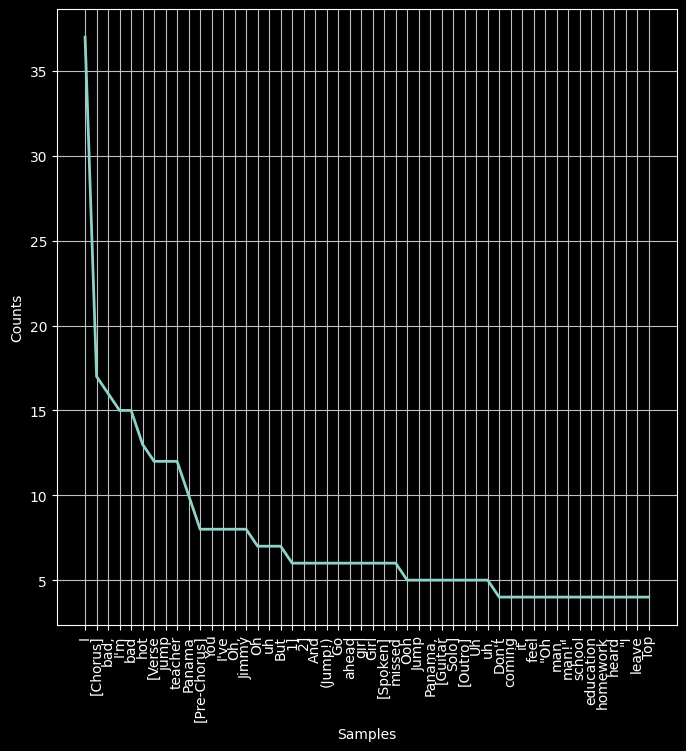

<Axes: xlabel='Samples', ylabel='Counts'>

In [23]:
# Plot the words
plt.figure(figsize = (8,8))
clean_wordlist_freq.plot(50, cumulative = False)

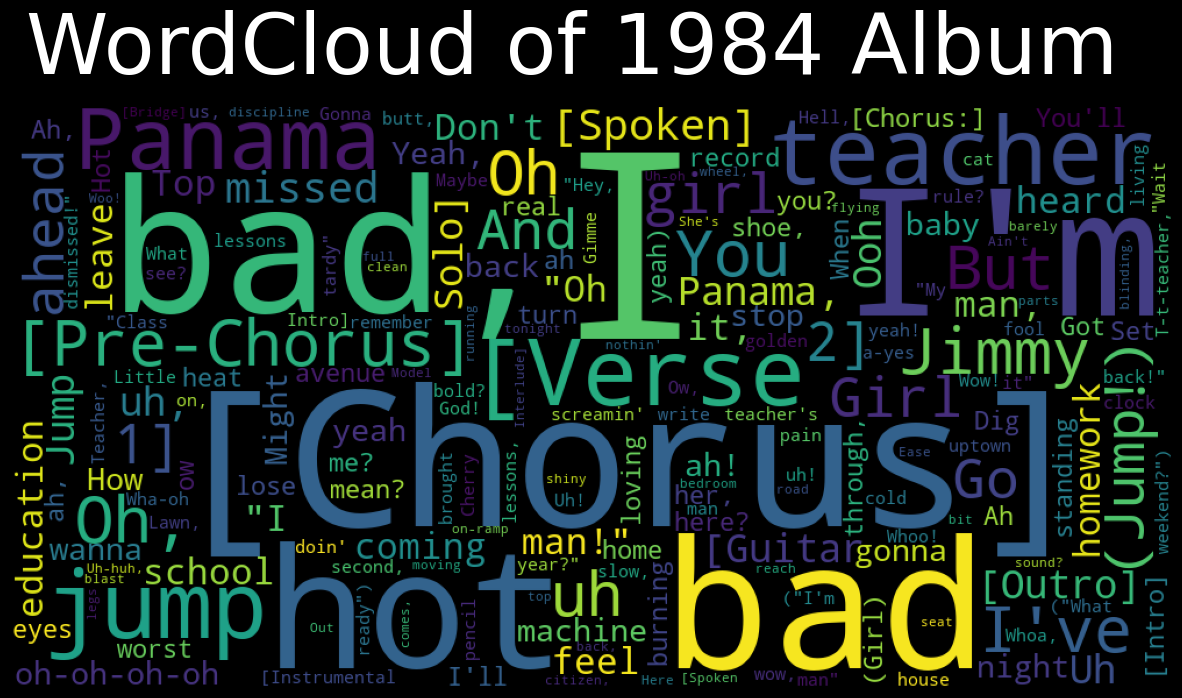

In [24]:
# Generate the WordCloud of the Album
count_clean_wordlist = Counter(clean_wordlist)
wordcloud_1984_album = WordCloud(width = 1000, height = 500).generate_from_frequencies(count_clean_wordlist)

plt.figure(figsize = (15,8))
plt.figtext(0.5,0.9, 'WordCloud of 1984 Album', fontsize = 60, ha = 'center')
plt.imshow(wordcloud_1984_album)
plt.axis('off')
plt.show()

In [25]:
#
clean_novel_wordlist = []

for word in novel_wordlist:
    if word not in stopwords:
        clean_novel_wordlist.append(word)
clean_novel_wordlist

['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'ONE',
 'Chapter',
 '1',
 'It',
 'bright',
 'cold',
 'day',
 'April,',
 'clocks',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'chin',
 'nuzzled',
 'breast',
 'effort',
 'escape',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'glass',
 'doors',
 'Victory',
 'Mansions,',
 'quickly',
 'prevent',
 'swirl',
 'gritty',
 'dust',
 'entering',
 'him.',
 'The',
 'hallway',
 'smelt',
 'boiled',
 'cabbage',
 'rag',
 'mats.',
 'At',
 'end',
 'coloured',
 'poster,',
 'large',
 'indoor',
 'display,',
 'tacked',
 'wall.',
 'It',
 'depicted',
 'simply',
 'enormous',
 'face,',
 'metre',
 'wide:',
 'face',
 'man',
 'forty-five,',
 'heavy',
 'black',
 'moustache',
 'ruggedly',
 'handsome',
 'features.',
 'Winston',
 'made',
 'stairs.',
 'It',
 'lift.',
 'Even',
 'times',
 'seldom',
 'working,',
 'present',
 'electric',
 'current',
 'cut',
 'daylight',
 'hours.',
 'It'

In [26]:
clean_novel_wordlist_freq = nltk.FreqDist(clean_novel_wordlist)
clean_novel_wordlist_freq

FreqDist({'The': 669, 'He': 646, 'It': 466, 'Winston': 316, 'I': 303, 'But': 218, 'Party': 193, 'There': 184, 'In': 173, 'They': 165, ...})

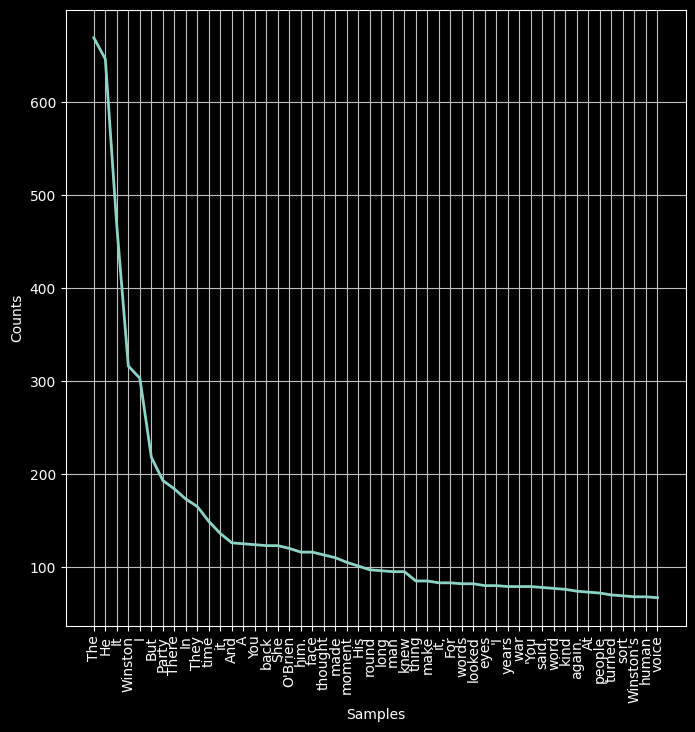

<Axes: xlabel='Samples', ylabel='Counts'>

In [27]:
# Plot the words
plt.figure(figsize = (8,8))
clean_novel_wordlist_freq.plot(50, cumulative = False)

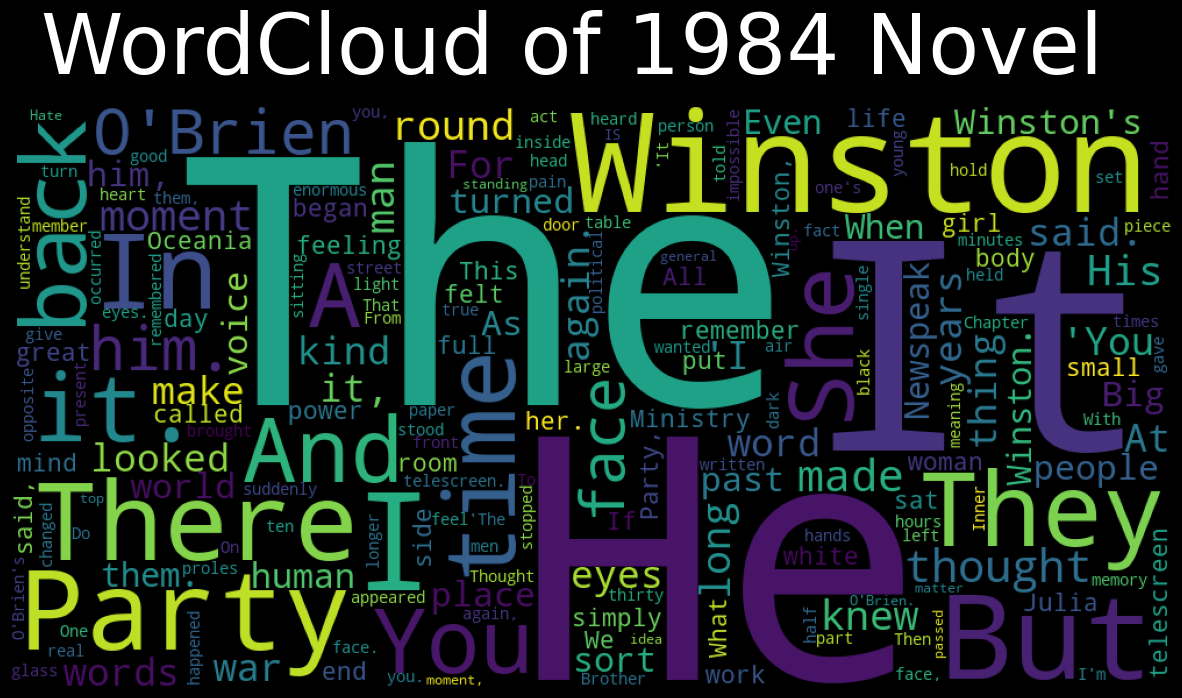

In [28]:
# Generate the WordCloud of the Novel
count_clean_novel_wordlist = Counter(clean_novel_wordlist)
wordcloud_1984_novel = WordCloud(width = 1000, height = 500).generate_from_frequencies(count_clean_novel_wordlist)

plt.figure(figsize = (15,8))
plt.figtext(0.5,0.9, 'WordCloud of 1984 Novel', fontsize = 60, ha = 'center')
plt.imshow(wordcloud_1984_novel)
plt.axis('off')
plt.show()

## Summarize text with NLP

In [29]:
# Download punkt tokenizer from NLTK package
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/deathslayer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# latent_semanic_analysis
lsa = LsaSummarizer(Stemmer('english'))

# Get the stop words
lsa.stop_words = get_stop_words('english')

# Parse the text strings 
parser = PlaintextParser.from_string(' '.join(album_corpus), Tokenizer('english'))

lsa_summary = lsa(parser.document,10)
lsa_summary

(<Sentence: Here she comes, full blast and top down Hot shoe, burning down the avenue Model citizen, zero discipline>,
 <Sentence: [Verse 2] Ain't nothin' like it, her shiny machine Got the feel for the wheel, keep the moving parts clean Hot shoe, burning down the avenue Out an on-ramp coming through my bedroom>,
 <Sentence: [Spoken Interlude] Ah Yeah, we're running a little bit hot tonight I can barely see the road from the heat coming off it, I say I reach down between my legs and Ease the seat back>,
 <Sentence: [Bridge] She's blinding, I'm flying Right behind in rearview mirror now Got the fearing, power steering Pistons popping, ain't no stopping now>,
 <Sentence: Dig those moves, vampire Set me loose, get it higher Throw my rope, loop-de-loop Nice white teeth, Betty Boop Set it cool, real heavy I ain't fooled, gettin' ready Oooh, aw baby>,
 <Sentence: [Verse 1] I get up and nothing gets me down You got it tough, I've seen the toughest around And I know, baby, just how you feel Yo

In [31]:
# Summarize the Album
lsa_summary_list = [str(sentence) for sentence in lsa_summary]
summary_album = ' '.join(lsa_summary_list)
print('Summary of the 1984 Album')
summary_album

Summary of the 1984 Album


"Here she comes, full blast and top down Hot shoe, burning down the avenue Model citizen, zero discipline [Verse 2] Ain't nothin' like it, her shiny machine Got the feel for the wheel, keep the moving parts clean Hot shoe, burning down the avenue Out an on-ramp coming through my bedroom [Spoken Interlude] Ah Yeah, we're running a little bit hot tonight I can barely see the road from the heat coming off it, I say I reach down between my legs and Ease the seat back [Bridge] She's blinding, I'm flying Right behind in rearview mirror now Got the fearing, power steering Pistons popping, ain't no stopping now Dig those moves, vampire Set me loose, get it higher Throw my rope, loop-de-loop Nice white teeth, Betty Boop Set it cool, real heavy I ain't fooled, gettin' ready Oooh, aw baby [Verse 1] I get up and nothing gets me down You got it tough, I've seen the toughest around And I know, baby, just how you feel You gotta roll with the punches to get to what's real [Verse 2] Found that girl wit

In [33]:
# latent_semanic_analysis
lsa = LsaSummarizer(Stemmer('english'))

# Get the stop words
lsa.stop_words = get_stop_words('english')

# Parse the text strings 
parser = PlaintextParser.from_string(' '.join(novel_corpus), Tokenizer('english'))

lsa_summary = lsa(parser.document,40)


In [34]:
# Summarize the Novel
lsa_summary_list = [str(sentence) for sentence in lsa_summary]
summary_novel = ' '.join(lsa_summary_list)
print('Summary of the 1984 Novel')
summary_novel

Summary of the 1984 Novel


"A hideous ecstasy of fear and vindictiveness, a desire to kill, to torture, to smash faces in with a sledge-hammer, seemed to flow through the whole group of people like an electric current, turning one even against one's will into a grimacing, screaming lunatic. His exploits had been gradually pushed backwards in time until already they extended into the fabulous world of the forties and the thirties, when the capitalists in their strange cylindrical hats still rode through the streets of London in great gleaming motor-cars or horse carriages with glass sides. When one knew that any document was due for destruction, or even when one saw a scrap of waste paper lying about, it was an automatic action to lift the flap of the nearest memory hole and drop it in, whereupon it would be whirled away on a current of warm air to the enormous furnaces which were hidden somewhere in the recesses of the building. For example, it appeared from 'The Times' of the seventeenth of March that Big Broth

## Perform Sentiment Analysis with NLP.

In [35]:
# Sentiment Analysis using NLTK's pre-build sentiment analyzer
nltk.download('vader_lexicon')

sentiment_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/deathslayer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:
# Sentiment Analysis of the Album 1984
print('Sentiment Analysis of 1984 Album')
print(sentiment_analyzer.polarity_scores(' '.join(album_corpus)))

Sentiment Analysis of 1984 Album
{'neg': 0.165, 'neu': 0.722, 'pos': 0.113, 'compound': -0.9986}


In [37]:
# Sentiment Analysis of the Novel 1984
print('Sentiment Analysis of 1984 Novel')
print(sentiment_analyzer.polarity_scores(' '.join(novel_corpus)))

Sentiment Analysis of 1984 Novel
{'neg': 0.106, 'neu': 0.798, 'pos': 0.096, 'compound': -1.0}


## Summarry of the Project

#### Leveraged Literature from 1984 for the book of George Orwell & The 1984 Album of Van Hallen American Band

#### -- Performed Textual Analysis
#### -- Built WordClouds
#### -- Performed Text Summarization using NLP
#### -- Compared Sentiment Analysis